# **Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Load the csv file

In [21]:
dat = pd.read_csv('/content/Loan_Data.csv')

Show the information of the data

In [22]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Show duplicate values


In [23]:
dat.duplicated().sum()

0

- No duplicates

Show missing values

In [24]:
dat.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Handling missing values of categorical variables

In [25]:
dat['Gender'] = dat['Gender'].fillna(dat['Gender'].mode()[0])
dat['Married'] = dat['Married'].fillna(dat['Married'].mode()[0])
dat['Dependents'] = dat['Dependents'].fillna(dat['Dependents'].mode()[0])
dat['Self_Employed'] = dat['Self_Employed'].fillna(dat['Self_Employed'].mode()[0])
dat['Credit_History'] = dat['Credit_History'].fillna(dat['Credit_History'].mode()[0])


Handling missing values of numeric variables

Graphing a boxplot of Loan amount

<Axes: xlabel='LoanAmount'>

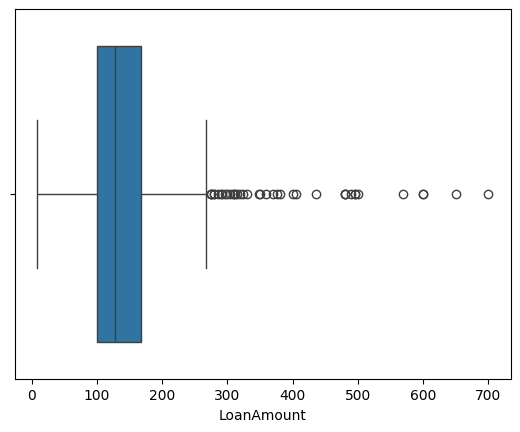

In [26]:
sns.boxplot(x='LoanAmount', data=dat)

- Since the variable has outliers, I will impute with the median

In [27]:
dat['LoanAmount'].fillna(dat['LoanAmount'].median(),inplace=True)

<ipython-input-27-811ab52af57b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat['LoanAmount'].fillna(dat['LoanAmount'].median(),inplace=True)


Graphing boxplot of Loan_amount_term

<Axes: xlabel='Loan_Amount_Term'>

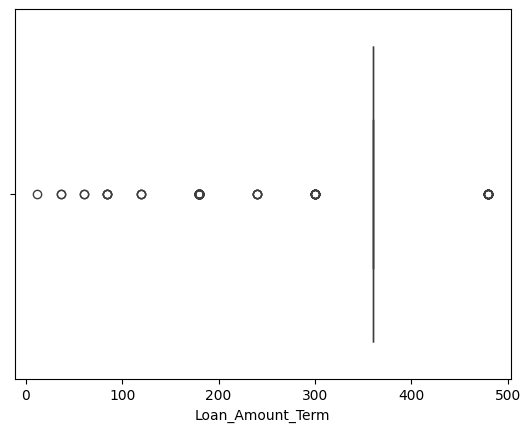

In [28]:
sns.boxplot(x='Loan_Amount_Term', data=dat)

- Since the variable has outliers, I will impute with the median

In [29]:
dat['Loan_Amount_Term'].fillna(dat['Loan_Amount_Term'].median(), inplace=True)

<ipython-input-29-5625899ba564>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat['Loan_Amount_Term'].fillna(dat['Loan_Amount_Term'].median(), inplace=True)


Dropping the Loan_ID column

In [30]:
dat.drop(columns=['Loan_ID'], axis=1, inplace=True)

In [31]:
dat.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Dealing with categorical data

In [32]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
dat = pd.get_dummies(dat, columns= cat_col, drop_first=True) # Apply one-hot Encoding and avoids multicollinearity
cat_bool = dat.select_dtypes('bool').columns.tolist()
dat[cat_bool] = dat[cat_bool].astype(int)
dat['Loan_Status'] = dat['Loan_Status'].map({'Y': 1, 'N': 0})

- Here I created dummy variables for the categorical variables using a function called get_dummies from pandas library
- Then I extracted the boolean type variabels and stored them in a variable called cat_bool
- Then I converted these variables to an integer type into the dataframe
- I converted the Loan_Status variable from charater type to an integer type using the map() function

Normalizing numeric values

In [33]:
num_variables = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
scaler = MinMaxScaler()
dat[num_variables] = scaler.fit_transform(dat[num_variables])

- First I extracted numerical features from the dataframe.
- I then used the MinMaxScaler() function to normalize the features
- Then I fitted the transformed data to the dataframe.

Separate the features from the target

In [34]:
target = dat['Loan_Status']
features = dat.drop(columns='Loan_Status',axis=1)

split dataset into training ad testing sets

In [35]:
features_train,features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

- I used the train_test_split() function to split the entries/records of my dataset into a 80:20 ratio.
- 80% of my dataframe records will be stored under the features_train and target_train variables.
- 20% will be stored under features_test and target_test variables
- Basically 80% of the data will be used for training and the remaining 20% will be used for testing

Fitting a decision tree model

In [36]:
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting

In [37]:
y_pred= DTClassifier.predict(features_test)

Display the accuracy


In [38]:
print('The accuracy of decision tree is:', metrics.accuracy_score(y_pred, target_test))

The accuracy of decision tree is: 0.7235772357723578


Fitting a Naive Bayes model

In [39]:
NBClassifier = GaussianNB()
NBClassifier.fit(features_train,target_train)
yhat = NBClassifier.predict(features_test)
print('The accuracy of Naive Bayes is:', metrics.accuracy_score(yhat, target_test))


The accuracy of Naive Bayes is: 0.7804878048780488


# Interpreting the model
- Based on the results of decision tree and Naive Bayes algorithms, the Naive Bayes algorithm is better
